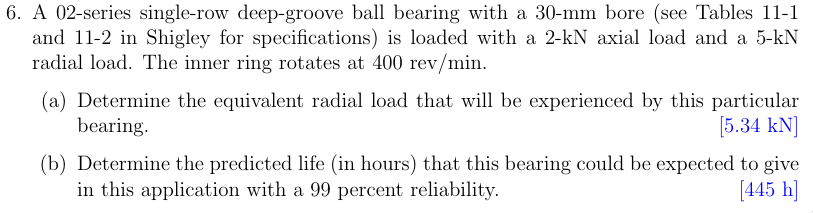

From Table 11-2 in Shigley, we note that a 02-series single-row deep-groove ball bearing with a 30-mm bore has $C_{10} = 19.5$ kN and $C_0 = 10.0$ kN


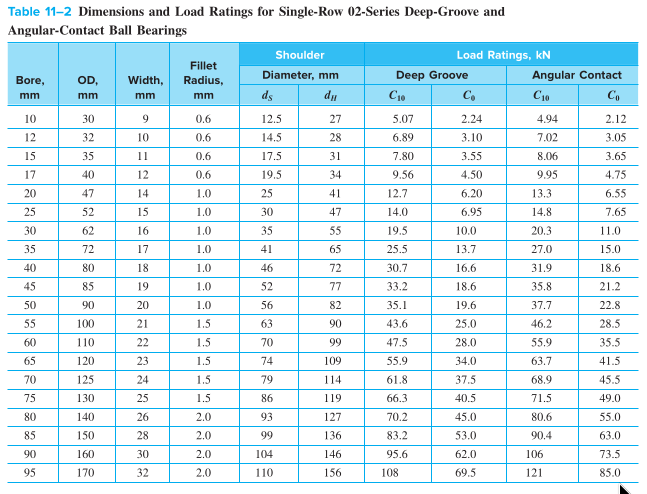


We first need to determine the value of $\frac{F_a}{V F_r}$ and compare it with the value of $e$. 

In [1]:
F_a = 2
F_r = 5
V = 1  #Since it is the inner ring that rotates

F_a/(V*F_r)

0.4

We need to compare the above value with e. 

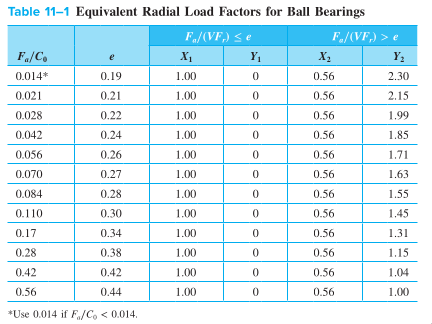

So, we need to evaluate $\frac{F_a}{C_0}$. 

In [2]:
C0 = 10

F_a/C0

0.2

From Table 11-1, we note that $e$ should be lying between 0.34 and 0.38. 

Therefore, we have: $\frac{F_a}{V F_r} > e$. 

Therefore the appropriate formula for the equivalent radial load is:
\begin{gather*}
F_e = X_2 V F_r + Y_2 F_a
\end{gather*}

where from Table 11-1, $X_2 = 0.56$ and $Y_2$ has to be determined from interpolation.

\begin{gather*}
\frac{Y_2 - 1.31}{1.15 - 1.31} = \frac{0.20 - 0.17}{0.28 - 0.20} \\
\implies Y_2 = 1.31 + (1.15 - 1.31)\frac{0.20 - 0.17}{0.28 - 0.20}
\end{gather*}

In [3]:
Y2 = 1.31 + (1.15 - 1.31)*(0.20-0.17)/(0.28-0.17)
display(Y2)

1.2663636363636364

In [4]:
X2 = 0.56
Y2 = 1.27 #approx
F_e = X2*V*F_r + Y2*F_a
display(F_e)

5.34

For part (b) of this problem we will use the same Weibull parameters as in part (b) of the previous problem. 

In [5]:
x_0 = 0.02
theta = 4.459
b = 1.483

First, we need to determine the life ($x_B$) at the same value of force as $C_{10}$ but on the 99 percent reliability line. We will consider the rated life as $10^6$ revolutions. 

\begin{gather*}
x_B = x_0 + (\theta - x_0)[\ln(1/R_D) ]^{1/b}
\end{gather*}

In [6]:
from math import log

In [7]:
R_D = 0.99
x_B = x_0 + (theta - x_0)*(log(1/R_D))**(1/b)

Next, on this 95 percent reliability line, we will calculate the life ($L$) corresponding to the equivalent radial load $F_e$. 
\begin{gather*}
F_B L_B^{1/a} = F_e L^{1/a} \\
\implies L = L_B \left(\frac{F_B}{F_e}\right)^a 
\end{gather*}
where $F_B = C_{10}$ and $L_B = x_B L_{10}$. 

In [8]:
L_10 = 1e6
L_B = x_B*L_10

C_10 = 19.5
F_B = C_10

a = 3 # ball bearing

L = L_B*(F_B/F_e)**a
display(L)

10692808.43318943

Therefore, the life in hours is:

In [9]:
L/(400*60)

445.5336847162262